In [4]:
import pickle
import IPython.display as ipd
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import signal
import scipy
import noisereduce as nr
#Reports
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import os
import pydub

In [5]:
audio_path = Path('/media/sasanka/Expansion/xeno-canto-bird-recordings-extended-a-m/A-M')

In [6]:
# e_file = 'A-M/amecro/XC264942.mp3'
# ipd.display(ipd.Audio(e_file))
# y, sr = librosa.load(e_file)
# reduced_noise = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2,stationary=False)

In [7]:
from scipy import signal
def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [8]:
sr = 32000

In [9]:
df = pd.read_csv('./train_extended.csv')
# Selecting high-rated sound only
dff = df[df['rating'] > 3.0]
# Selecting shorter files only, less data to process
dff = dff[df['duration'] < 20]
print(len(dff))

3954


In [10]:
# Selecting birds with more than 10 examples left
dfc = dff.groupby('ebird_code')['ebird_code'].count()
dff = dff[~dff['ebird_code'].isin(dfc[dfc.values < 20].index)]
print(len(dff))

2967


In [11]:
sound_categories = dff['ebird_code'].unique()

In [12]:
sound_categories

array(['amecro', 'amerob', 'barswa', 'bewwre', 'blujay', 'bnhcow',
       'cangoo', 'carwre', 'caster1', 'chispa', 'comrav', 'comred',
       'comter', 'comyel', 'daejun', 'easmea', 'eastow', 'eucdov',
       'eursta', 'gadwal', 'gnwtea', 'greegr', 'grtgra', 'grycat',
       'horlar', 'houfin', 'houspa', 'houwre', 'mallar3', 'marwre',
       'norcar', 'norfli', 'normoc', 'redcro', 'rewbla', 'savspa',
       'sonspa', 'spotow', 'swathr', 'tuftit', 'warvir', 'wesmea',
       'whtspa'], dtype=object)

In [13]:
def reduce_noise(y, sr):
    reduced_noise = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2,stationary=False)
    return f_high(reduced_noise, sr)

In [15]:
#Creating subfolders
sound_categories
subfolder_names = sound_categories
for subfolder_name in subfolder_names:
    try:
        os.makedirs(os.path.join('mel_cleaned_images', subfolder_name))
    except:
        pass

In [16]:
def mel_spectrogram_images(sound_path, category_name, file_name):
    y, y_sr = librosa.load(sound_path, mono=True)
        
    mel_spect = librosa.feature.melspectrogram(y=y, sr=y_sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect, fmax=8000)
    #plt.title('Mel Spectrogram');
    #plt.colorbar(format='%+2.0f dB');
    
    
    # As png
    plt.savefig('mel_cleaned_images/'+ category_name + '/' + file_name +'.png')

Bird: houwre  files: 214
['XC587912.mp3' 'XC586689.mp3' 'XC585688.mp3' 'XC585313.mp3'
 'XC584990.mp3' 'XC578529.mp3' 'XC573807.mp3' 'XC571025.mp3'
 'XC562333.mp3' 'XC554229.mp3' 'XC539380.mp3' 'XC508100.mp3'
 'XC500153.mp3' 'XC497632.mp3' 'XC494257.mp3' 'XC493634.mp3'
 'XC491641.mp3' 'XC483968.mp3' 'XC458436.mp3' 'XC456914.mp3'
 'XC452149.mp3' 'XC443230.mp3' 'XC436780.mp3' 'XC429166.mp3'
 'XC428664.mp3' 'XC422343.mp3' 'XC420010.mp3' 'XC414148.mp3'
 'XC396556.mp3' 'XC390418.mp3' 'XC390112.mp3' 'XC386603.mp3'
 'XC386600.mp3' 'XC385117.mp3' 'XC382495.mp3' 'XC381077.mp3'
 'XC379340.mp3' 'XC377484.mp3' 'XC374375.mp3' 'XC366469.mp3'
 'XC356162.mp3' 'XC347633.mp3' 'XC342583.mp3' 'XC332393.mp3'
 'XC332392.mp3' 'XC332391.mp3' 'XC332390.mp3' 'XC331284.mp3'
 'XC328922.mp3' 'XC326992.mp3' 'XC321496.mp3' 'XC321087.mp3'
 'XC320030.mp3' 'XC319382.mp3' 'XC318702.mp3' 'XC317186.mp3'
 'XC264026.mp3' 'XC262415.mp3' 'XC262414.mp3' 'XC82443.mp3' 'XC82441.mp3'
 'XC46856.mp3' 'XC46855.mp3' 'XC46854.mp3' 'XC4

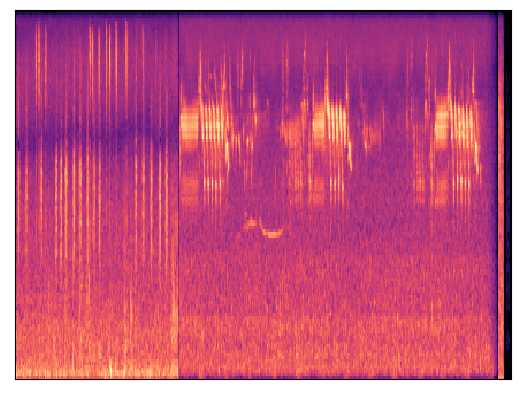

In [18]:
#category_progress = tqdm(sound_categories)
for category_name in ['houwre']:
    #Walk through the dataframe filename values
    l_files = dff[dff['ebird_code'] == category_name]['filename'].values
    print("Bird: "+category_name+"  files: "+str(len(l_files)))
    print(l_files)
    for file_name in l_files:
        try:
            sound_path = audio_path/category_name/file_name
            # print(sound_path)
            mel_spectrogram_images(sound_path, category_name, file_name.strip('.mp3'))
        except Exception as e:
            print(e)
            pass